# Natural Language Processing Project

In [75]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Data Retrieval

In [76]:
yelp = pd.read_csv("./filez/yelp/yelp.csv")
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


## Exploratory Data Analysis

In [77]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [78]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [79]:
# add new column with the length of field `text`
yelp["text_length"] = yelp["text"].apply(len)

## Data Visualization

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: >]], dtype=object)

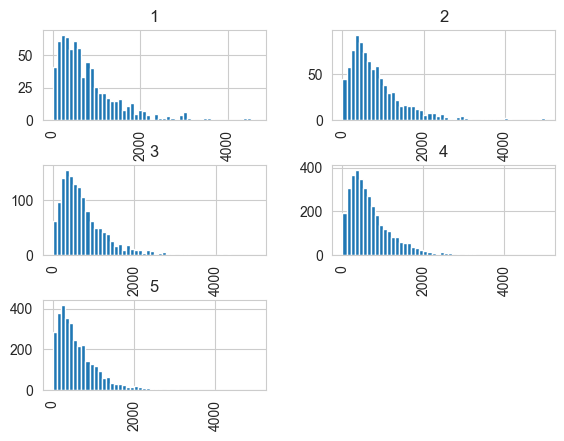

In [80]:
# show text length distribution by the start category on one histogram x star category
yelp.hist(column="text_length", by="stars", bins=50)

    - similar distribution across all stars
    - the higher the rating, the more text

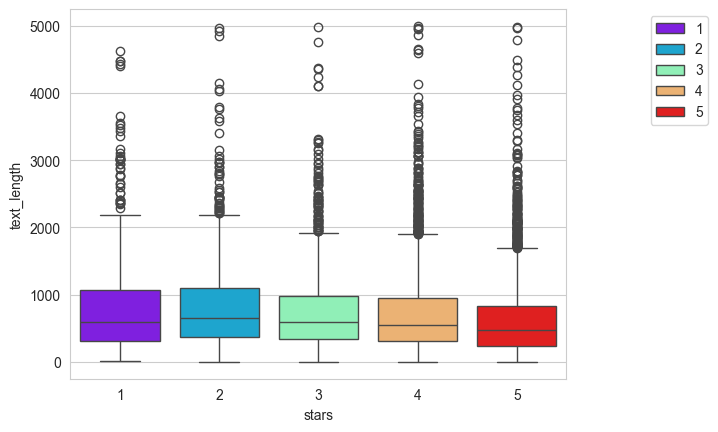

In [96]:
# show text length for each star in a boxplot
sns.boxplot(data=yelp, x="stars", y="text_length", hue="stars", palette="rainbow")

# move the legend out of the center!
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

    - a lot of outliers, so length may not be a good feature

<Axes: xlabel='stars', ylabel='count'>

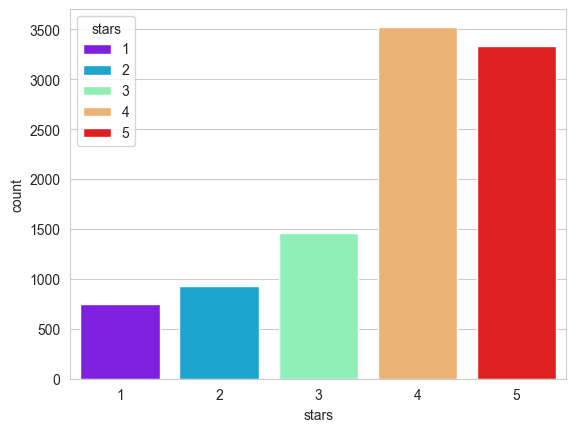

In [97]:
# show the num. of occurrences for each type of star rating in a countplot
sns.countplot(data=yelp, x="stars", hue="stars", palette="rainbow")

In [83]:
# describe mean values of numerical columns
yelp.groupby("stars").describe()

cool                                                useful            \
        count      mean       std  min  25%  50%  75%   max   count      mean   
stars                                                                           
1       749.0  0.576769  1.474759  0.0  0.0  0.0  1.0  17.0   749.0  1.604806   
2       927.0  0.719525  1.491182  0.0  0.0  0.0  1.0  14.0   927.0  1.563107   
3      1461.0  0.788501  1.602576  0.0  0.0  0.0  1.0  18.0  1461.0  1.306639   
4      3526.0  0.954623  2.034367  0.0  0.0  0.0  1.0  38.0  3526.0  1.395916   
5      3337.0  0.944261  2.484583  0.0  0.0  0.0  1.0  77.0  3337.0  1.381780   

       ... funny       text_length                                       \
       ...   75%   max       count        mean         std   min    25%   
stars  ...                                                                
1      ...   1.0  30.0       749.0  826.515354  742.929304  11.0  315.0   
2      ...   1.0  20.0       927.0  842.256742  704.079491   7.0  365.5   
3      ...   1.0  24.0      1461.0  758.498289  627.594294   1.0  342.0   
4      ...   1.0  57.0      3526.0  712.923142  600.158476   2.0  307.0   
5      ...   1.0  39.0      3337.0  624.999101  558.578229   6.0  243.0   

                               
         50%      75%     max  
stars                          
1      600.0  1075.00  4618.0  
2      656.0  1105.00  4972.0  
3      599.0   975.00  4975.0  
4      551.5   945.75  4997.0  
5      471.0   826.00  4986.0  

[5 rows x 32 columns]

In [104]:
stars = (
    yelp[["stars", "cool", "useful", "funny", "text_length"]].groupby("stars").mean()
)
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [110]:
# show correlation of yelp's numeric fields
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

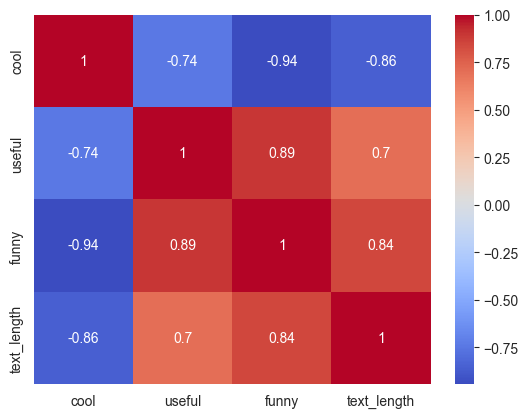

In [112]:
# show the above correlation on a hitmap
sns.heatmap(data=stars.corr(), cmap="coolwarm", annot=True)

    - funny seems highly correlated with useful
    - useful seems quite correlated to text length
    - cool seems quite unrelated to funny & useful

## NLP Classification Task

In [114]:
# Get only reviews with 1 or 5 stars
yelp_class = yelp[(yelp["stars"] == 1) | (yelp["stars"] == 5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text_length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [116]:
from sklearn.feature_extraction.text import CountVectorizer

X = yelp_class["text"]
y = yelp_class["stars"]

cv = CountVectorizer()
X = cv.fit_transform(X)

## Train the Model

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [118]:
from sklearn.naive_bayes import MultinomialNB

# train the model
nb = MultinomialNB().fit(X_train, y_train)

## Predictions & Evaluations

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = nb.predict(X_test)

In [91]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## Text Processing

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [123]:
pipe = Pipeline(
    [
        ("bow", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("classifier", MultinomialNB()),
    ]
)

In [124]:
X = yelp_class["text"]
y = yelp_class["stars"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [125]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [127]:
predictions = pipe.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wint3rmute/Gro/datascilabs/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Looks like Tf-Idf actually made things worse! That is it for this project.

TODO:
- custome analyzer
- pipe with just CountVectorizer() and NaiveBayes
- changing ML classifier